In [119]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [120]:
xp = np.linspace(-1.0, 5.0, 100)

In [121]:
f = lambda x: 2*np.cos(x) - x/5
df = lambda f, x, h: (f(x+h) - f(x-h)) / (2*h)
d2f = lambda f, x, h: (f(x+h) - 2*f(x) + f(x-h)) / (h**2)

In [122]:
def newton_root(f, x):
    h = 1.0E-6
    while 1:
        x = x - f(x) / df(f, x, h)
        if np.abs(f(x)) < 1.0E-5: break
    return x

In [123]:
def newton(f, x):
    h = 1.0E-6
    while 1:
        x = x - df(f,x,h) / d2f(f,x,h)
        if np.abs(df(f,x,h)) < 1.0E-5: break
    return x

In [124]:
def golden(f, xl, xr):
    d = xr - xl;
    r = (np.sqrt(5) - 1) / 2.0
    x1 = xl + r*d
    x2 = xr - r*d
    while 1:
        if f(x1) > f(x2):
            xl = x2
            x2 = x1
            d = xr - xl
            x1 = xl + r*d
        else:
            xr = x1
            x1 = x2
            d = xr - xl
            x2 = xr - r*d
        if np.abs(d) < 1.0E-5: break
    # returning the optimal point
    return (x1 + x2) / 2

In [125]:
def quadratic(f, x):
    # x: [x0, x1, x2]
    h = 1.0E-6
    while 1:
        n1 = f(x[0])*(x[1]**2 - x[2]**2)
        n2 = f(x[1])*(x[2]**2 - x[0]**2)
        n3 = f(x[2])*(x[0]**2 - x[1]**2)
        d1 = 2*f(x[0])*(x[1]-x[2])
        d2 = 2*f(x[1])*(x[2]-x[0])
        d3 = 2*f(x[2])*(x[0]-x[1])
        x3 = (n1+n2+n3)/(d1+d2+d3) 
        if np.abs(df(f, x3, h))<1.0E-5:
            xOpt = x3
            break
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x3
    return xOpt

In [128]:
x0 = 1.0
xRoot = newton_root(f, x0)
xPeak = newton(f, x0)
xPeakGolden = golden(f, -1.0, 1.0)
xPeakQuad = quadratic(f, [-1.0, 1.0, 2.0])
print(xRoot)
print(xPeak)
print(xPeakGolden)
print(xPeakQuad)

1.4275517792427852
-0.10016743651528873
-0.10016716315977567
-0.10016802685422636


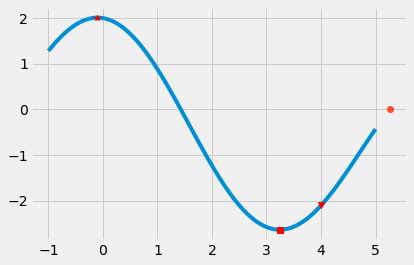

In [127]:
fig = plt.figure(1); plt.clf(); ax = fig.add_subplot(1,1,1)
ax.plot(xp, f(xp))
ax.plot(x0, f(x0), "vr")
ax.plot(xRoot, f(xRoot), 'o')
ax.plot(xPeak, f(xPeak), 'sr')
ax.plot(xPeakGolden, f(xPeakGolden), "*r")
